In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix,classification_report,f1_score

In [44]:
df=pd.read_csv('creditcard.csv')
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
90027,62839.0,-0.639500,0.767079,1.765981,1.143738,-0.012798,-0.118725,0.541427,0.172777,-0.517139,...,0.157691,0.315050,-0.228398,0.028947,0.321174,-0.063793,0.070621,0.075017,40.00,0
85185,60643.0,0.614429,-1.786269,0.429934,0.776229,-1.224737,1.047080,-0.649206,0.268414,-0.207560,...,-0.362736,-1.174889,-0.356502,-0.890719,0.290530,-0.418659,0.020433,0.078419,360.58,0
198593,132558.0,0.371957,0.787124,-1.483581,-0.533387,0.789854,-0.566899,0.037223,-3.043445,-0.513185,...,-1.098655,0.864208,-0.111636,0.737621,0.431036,0.706481,0.068666,0.325526,39.98,0
34548,37718.0,-2.969572,-1.556769,-1.108170,0.273417,1.452923,3.309733,-2.802410,2.233235,-1.235312,...,-0.076606,-0.111840,-0.872130,1.098311,-0.949413,-0.278832,0.139025,-0.613050,52.54,0
111264,72164.0,-1.558836,1.091210,1.174764,-2.373137,-1.214830,-0.255979,-1.277489,-2.027356,0.874391,...,-1.242397,0.399451,-0.053329,-0.177240,0.301000,-0.038923,0.143310,0.094089,25.90,0


In [45]:
df.shape

(284807, 31)

In [46]:
X=df.drop(columns=['Class','Time','Amount'])

In [47]:
y=df.iloc[:,-1:]

In [48]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [49]:
y.sum()

Class    492
dtype: int64

In [50]:
lr=LogisticRegression()

In [51]:
lr.fit(X,y)

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [52]:
df.shape

(284807, 31)

In [53]:
X=df.drop(columns=['Class','Time','Amount'])

In [54]:
y=df.iloc[:,-1:]

In [55]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [56]:
lr=LogisticRegression(class_weight={0:1,1:2})

In [57]:
lr.fit(X,y)

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight={0: 1, 1: 2})

In [58]:
predicted_y=lr.predict(X)

In [59]:
precision_score(y,predicted_y)

0.8283752860411899

In [60]:
predicted_y.sum()

437

In [61]:
recall_score(y,predicted_y)

0.7357723577235772

In [62]:
f1_score(y,predicted_y)

0.7793326157158235

In [63]:
accuracy_score(y,predicted_y)

0.999280214320575

In [64]:
confusion_matrix(y,predicted_y)

array([[284240,     75],
       [   130,    362]], dtype=int64)

<AxesSubplot: >

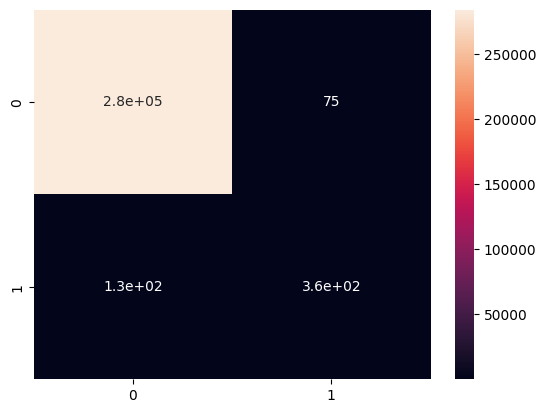

In [66]:
sns.heatmap(confusion_matrix(y,predicted_y),annot=True)

In [68]:
print(classification_report(y,predicted_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.83      0.74      0.78       492

    accuracy                           1.00    284807
   macro avg       0.91      0.87      0.89    284807
weighted avg       1.00      1.00      1.00    284807

